<a href="https://colab.research.google.com/github/nw93929/DS2002FinalProject/blob/main/visualization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/nw93929/DS2002FinalProject # access data loaded from shared github

In [ ]:
!pip install plotnine

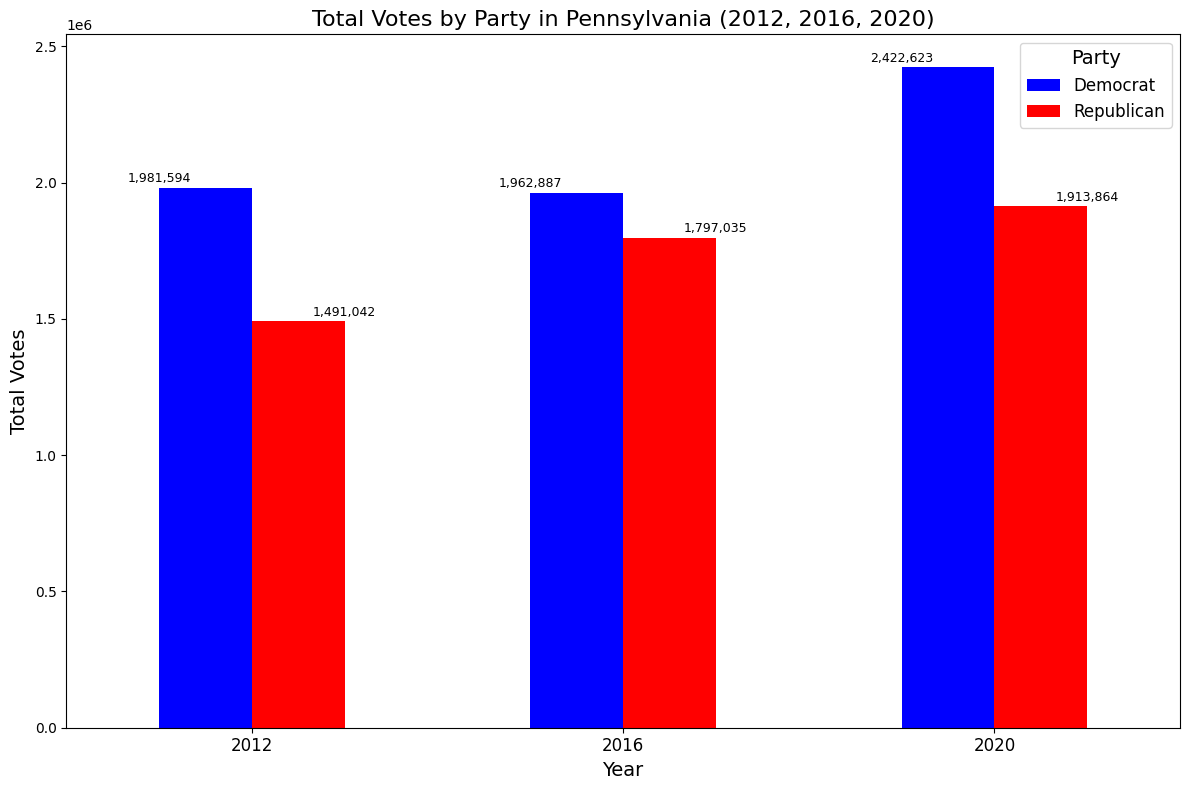

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = "pennoutcomes.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Filter for US PRESIDENT election for the years 2012, 2016, and 2020
df_filtered = df[(df['year'].isin([2012, 2016, 2020])) & (df['office'] == 'US PRESIDENT')]

# Group by year and party to sum votes
grouped = df_filtered.groupby(['year', 'party'])['candidatevotes'].sum().reset_index()

# Pivot the data to create a party-vs-year table
pivot_data = grouped.pivot(index='party', columns='year', values='candidatevotes').fillna(0)

# Plotting the grouped bar chart
colors = {'REPUBLICAN': 'red', 'DEMOCRAT': 'blue'}
pivot_data.T.plot(kind='bar', figsize=(12, 8), color=[colors[party] for party in pivot_data.index])

# Styling the chart
plt.title('Total Votes by Party in Pennsylvania (2012, 2016, 2020)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Votes', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Party', labels=['Democrat', 'Republican'], fontsize=12, title_fontsize=14)
plt.tight_layout()

# Add vote totals above each bar
for year_idx, year in enumerate(pivot_data.columns):
    for party_idx, party in enumerate(pivot_data.index):
        vote_count = pivot_data.loc[party, year]
        if vote_count > 0:
            plt.text(year_idx - 0.25 + (party_idx * 0.5), vote_count + 20000, f"{int(vote_count):,}", ha='center', fontsize=9)

# Show the plot
plt.show()

In [9]:
import pandas as pd

# Filter for US PRESIDENT election in 2016
df_2016 = df[(df['year'] == 2016) & (df['office'] == 'US PRESIDENT')]

# Group by candidate and sum the votes
candidate_totals_2016 = df_2016.groupby('candidate')['candidatevotes'].sum().reset_index()

# Sort by total votes in descending order
candidate_totals_2016 = candidate_totals_2016.sort_values(by='candidatevotes', ascending=False)

# Print results
print(candidate_totals_2016)

# Identify the winner
winner_2016 = candidate_totals_2016.iloc[0]
print(f"The winner in 2016 was {winner_2016['candidate']} with {winner_2016['candidatevotes']} votes.")

         candidate  candidatevotes
1  HILLARY CLINTON         1962887
0     DONALD TRUMP         1797035
The winner in 2016 was HILLARY CLINTON with 1962887 votes.
